In [1]:
import os
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

## Setting directory path

DATA_DIR = os.path.join("C:\\avi\\ai_academy","data")
IMAGE_DIR = os.path.join("C:\\avi\\ai_academy","images")

In [2]:
## load the data and print the shape
df = pd.read_csv(os.path.join(DATA_DIR, "aavail-data-visualization.csv"), index_col=0)
print("df : {} x {}".format(df.shape[0],df.shape[1]))

df : 1000 x 6


In [8]:
## missing values summary
print("Missing Value Summary\n{}".format("-"*35))
print(df.isnull().sum(axis = 0))

Missing Value Summary
-----------------------------------
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams        46
dtype: int64


In [55]:
xx = pd.Series(df.count(axis = 0),name='nonnull')

In [56]:
xx

country_name       1000
age                1000
customer_name      1000
is_subscriber      1000
subscriber_type     928
num_streams         954
Name: nonnull, dtype: int64

In [50]:
type(xx)

pandas.core.series.Series

In [51]:
xx

country_name       1000
age                1000
customer_name      1000
is_subscriber      1000
subscriber_type     928
num_streams         954
dtype: int64

In [69]:
missing_values = pd.Series(df.isnull().sum(axis = 0), name='missing')

In [70]:
result = pd.concat([xx, missing_values], axis=1)

In [71]:
result

,nonnull,missing
country_name,1000,0
age,1000,0
customer_name,1000,0
is_subscriber,1000,0
subscriber_type,928,72
num_streams,954,46


In [65]:
type(result)

pandas.core.frame.DataFrame

In [114]:
result

,nonnull,missing
country_name,1000,0
age,1000,0
customer_name,1000,0
is_subscriber,1000,0
subscriber_type,928,72
num_streams,954,46


In [63]:
df_missing_values

,field,missing_rows
0,country_name,0
1,age,0
2,customer_name,0
3,is_subscriber,0
4,subscriber_type,72
5,num_streams,46


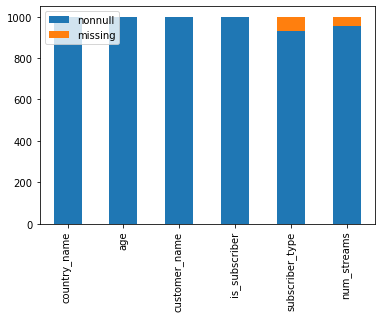

In [72]:
ax1 = result.plot.bar(rot=90,label = 'Missing rows for each input field', stacked=True)

In [79]:
df_country = df.groupby(['country_name'])['country_name','subscriber_type','num_streams'].count()

In [80]:
df_country

,country_name,subscriber_type,num_streams
country_name,,,
singapore,300,279,278
united_states,700,649,676


In [81]:
df_country['subscriber_type_missing']= df_country['country_name']-df_country['subscriber_type']

In [82]:
df_country

,country_name,subscriber_type,num_streams,subscriber_type_missing
country_name,,,,
singapore,300,279,278,21
united_states,700,649,676,51


In [104]:
df_country['num_streams_missing']= df_country['country_name']-df_country['num_streams']

In [115]:
type(df_country)

pandas.core.frame.DataFrame

In [131]:
df_country = df_country[['subscriber_type','subscriber_type_missing','num_streams','num_streams_missing']]

In [132]:
df_country

,subscriber_type,subscriber_type_missing,num_streams,num_streams_missing
country_name,,,,
singapore,279,21,278,22
united_states,649,51,676,24


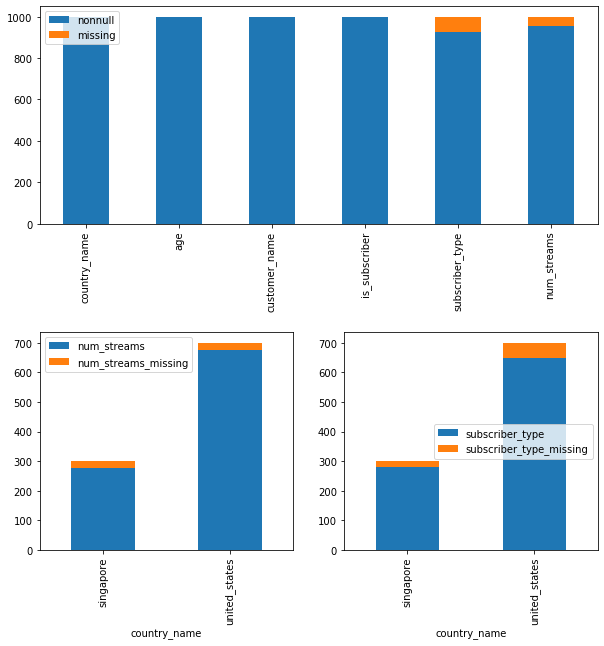

In [207]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,(1,2))
result.plot.bar(rot=90, stacked=True, ax = ax1)
plt.subplots_adjust(hspace = .5)
ax2 = plt.subplot(2, 2, 3)
df_country.plot.bar(y = ['num_streams','num_streams_missing'], stacked= True, ax=ax2)
ax3 = plt.subplot(2, 2, 4)
df_country.plot.bar(y = ['subscriber_type','subscriber_type_missing'], stacked= True, ax=ax3)
plt.show()


In [208]:
result

,nonnull,missing
country_name,1000,0
age,1000,0
customer_name,1000,0
is_subscriber,1000,0
subscriber_type,928,72
num_streams,954,46


In [209]:
result_total = result['nonnull']+result['missing']

In [210]:
result_total

country_name       1000
age                1000
customer_name      1000
is_subscriber      1000
subscriber_type    1000
num_streams        1000
dtype: int64

In [220]:
result_rel = result[result.columns[0:]].div(result_total,axis=0,)*100

In [221]:
result_rel

,nonnull,missing
country_name,100.0,0.0
age,100.0,0.0
customer_name,100.0,0.0
is_subscriber,100.0,0.0
subscriber_type,92.8,7.2
num_streams,95.4,4.6


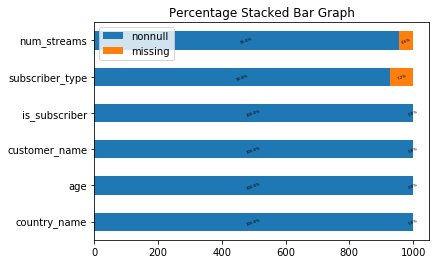

In [249]:
import numpy as np
result.plot(   
  kind = 'barh',  
  stacked = True,  
  title = 'Percentage Stacked Bar Graph',  
  mark_right = True) 

for n in result_rel: 
    for i, (cs, ab, pc) in enumerate(zip(result.iloc[:, 0:].cumsum(1)[n],  
                                         result[n], result_rel[n])): 
        plt.text(cs - ab/ 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center', rotation = 20, fontsize = 4)



        


In [250]:
for n in result_rel: 
    for i, (cs, ab, pc) in enumerate(zip(result.iloc[:, 0:].cumsum(1)[n],  
                                         result[n], result_rel[n])):
        print('i : {} -- cs:{}-- ab : {} -- pc:{}'.format(i, cs, ab, pc))

i : 0 -- cs:1000-- ab : 1000 -- pc:100.0
i : 1 -- cs:1000-- ab : 1000 -- pc:100.0
i : 2 -- cs:1000-- ab : 1000 -- pc:100.0
i : 3 -- cs:1000-- ab : 1000 -- pc:100.0
i : 4 -- cs:928-- ab : 928 -- pc:92.80000000000001
i : 5 -- cs:954-- ab : 954 -- pc:95.39999999999999
i : 0 -- cs:1000-- ab : 0 -- pc:0.0
i : 1 -- cs:1000-- ab : 0 -- pc:0.0
i : 2 -- cs:1000-- ab : 0 -- pc:0.0
i : 3 -- cs:1000-- ab : 0 -- pc:0.0
i : 4 -- cs:1000-- ab : 72 -- pc:7.199999999999999
i : 5 -- cs:1000-- ab : 46 -- pc:4.6


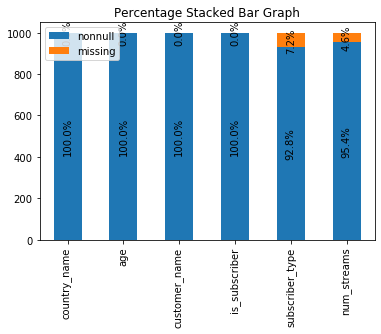

In [254]:
import numpy as np
result.plot(   
  kind = 'bar',  
  stacked = True,  
  title = 'Percentage Stacked Bar Graph',  
  mark_right = True) 

for n in result_rel: 
    for i, (cs, ab, pc) in enumerate(zip(result.iloc[:, 0:].cumsum(1)[n],  
                                         result[n], result_rel[n])): 
        plt.text(i, cs - ab/ 2, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center', rotation = 90, fontsize = 10)

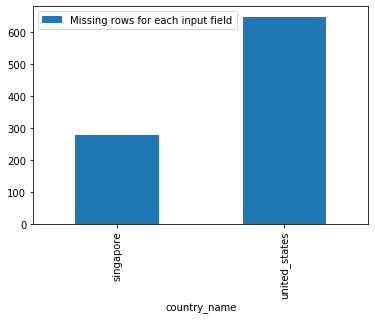

In [113]:
ax2 = df_country.plot.bar(y = 'subscriber_type',rot=90,label = 'Missing rows for each input field', stacked=False)